### OpenCV Tutorial

To install opencv - ```pip install opencv-python``` \
> Reference Link - https://www.geeksforgeeks.org/how-to-install-opencv-for-python-in-windows/


- To read an image using opencv. 
>Reference Link - https://www.geeksforgeeks.org/reading-image-opencv-using-python/

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

- use the function : ```cv2.imread('path of the image file')```

In [4]:
# make sure you have the images in the same folder as this file
# reading all the images 
demo_image = cv2.imread('lena.png')

- by default, opencv reads image as BGR color space. To display it as RGB, we need to convert it using ```cv2.cvtColor('name of the variable where you used imread')```

In [10]:
# converting the images to rgb
demo_image = cv2.cvtColor(demo_image, cv2.COLOR_BGR2RGB)

- for plotting the image, use the matplotlib library and the function ```plt.imshow('image name')```

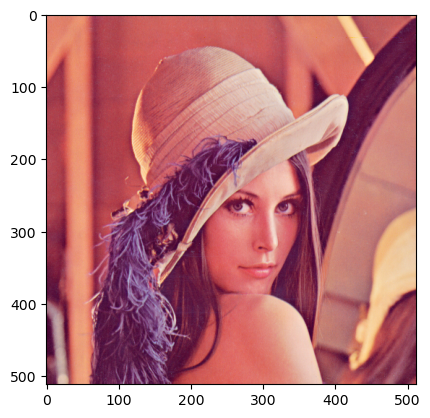

In [11]:
plt.imshow(demo_image)
plt.show()

- getting the histogram of the image

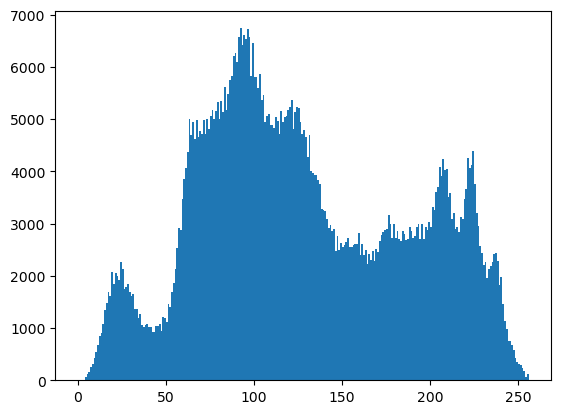

In [7]:
plt.hist(demo_image.ravel(), 256, [0, 256])
plt.show()

Explanation for the above line of code : 

```plt```: This is an alias for the matplotlib.pyplot module, which provides functions to create various types of plots and visualizations.

```hist()```: This is a function from the matplotlib.pyplot module that is used to create histograms.

```demo_image.ravel()```: This part flattens the 2D array demo_image into a 1D array. The ravel() function essentially rearranges all the elements of the array into a single linear sequence.

```256```: This parameter specifies the number of bins (or bars) that the histogram will have. Each bin represents a range of pixel intensity values, and the histogram will count how many pixels fall into each of these ranges.

```[0, 256]```: This parameter specifies the range of pixel intensity values that the histogram will cover. In this case, it's from 0 to 255 (256 possible values for an 8-bit image). The histogram will show the distribution of pixel values within this range.

When you run this line of code, it will create a histogram visualization showing how the pixel intensity values are distributed across the specified range. The x-axis of the histogram will represent the pixel intensity values, and the y-axis will represent the frequency of pixels that have those intensity values.

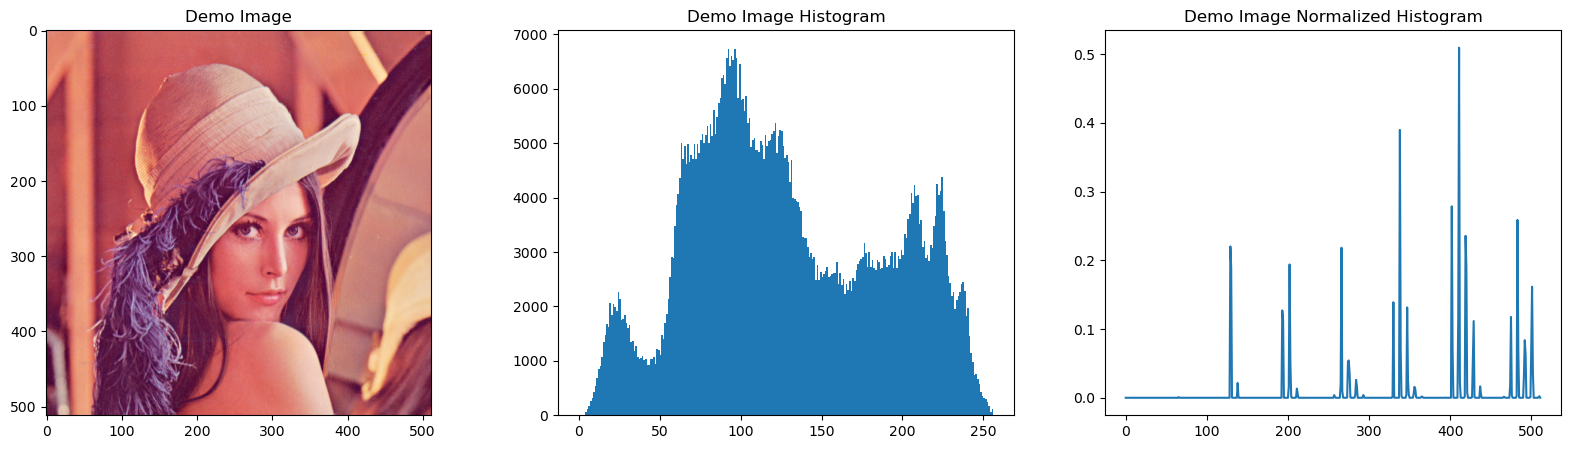

In [12]:
# obtaining the histogram of the query image
demo_hist = cv2.calcHist([demo_image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])

# normalizing the histogram
demo_hist_norm = cv2.normalize(demo_hist, demo_hist).flatten()

# plotting the query image and its histogram
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(demo_image)
plt.title("Demo Image")
plt.subplot(1, 3, 2)
plt.hist(demo_image.ravel(), 256, [0, 256])
plt.title("Demo Image Histogram")
plt.subplot(1, 3, 3)
plt.plot(demo_hist_norm)
plt.title("Demo Image Normalized Histogram")
plt.show()

Explanation for above lines of code : \
> ```cv2.calcHist([demo_image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])```: 
This line calculates the histogram of the query_image using the cv2.calcHist() function from the OpenCV library. 

```[demo_image]```: This is a list containing the query image.

```[0, 1, 2]```: This specifies the channels for which the histogram will be calculated. In this case, it calculates histograms for the Blue (0), Green (1), and Red (2) color channels.

```None```: This parameter is used for a mask if needed (not used in this case).

```[8, 8, 8]```: This parameter specifies the number of bins for each color channel. It means that each channel will be divided into 8 bins.

```[0, 256, 0, 256, 0, 256]```: This parameter specifies the range of pixel values for each channel. The format is [start_0, end_0, start_1, end_1, start_2, end_2]. In this case, each channel's pixel values range from 0 to 255.

> ```query_hist_norm = cv2.normalize(query_hist, query_hist).flatten()```

```cv2.normalize(query_hist, query_hist)```: This line normalizes the calculated histogram using the cv2.normalize() function from OpenCV. Normalization ensures that the histogram values are scaled to be between 0 and 1, which is particularly useful when comparing histograms.

```.flatten()```: This function is applied to the normalized histogram to convert it from a multi-dimensional array to a 1D array. Flattening the histogram simplifies its representation and makes it easier to work with.

##### Conversion of Each Color Histograms to one Histogram :

In the above code, we have given the bins as 8,8,8. So therefore the total number of bins is ```8*8*8``` = 512. Now for every pixel, we take the pixel value of each channel that is Red, Blue and Green and check which bin it falls into and increment that bin count by 1. This gives us a histogram of 512 bins for each image.

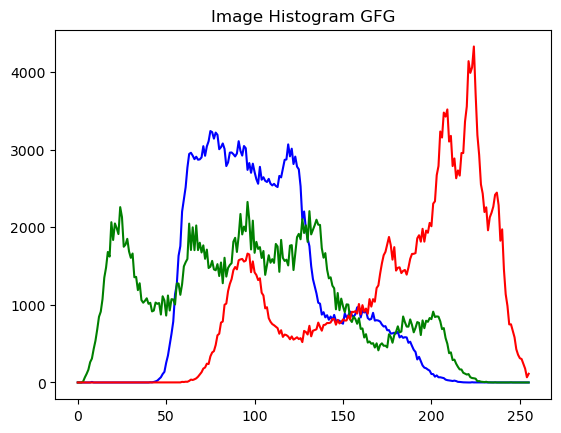

In [13]:
# Python program to compute and visualize the
# histogram of image for all three channels

# importing libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# reading the input image
img = cv2.imread('lena.png')

# define colors to plot the histograms
colors = ('b','g','r')

# compute and plot the image histograms
for i,color in enumerate(colors):
	hist = cv2.calcHist([img],[i],None,[256],[0,256])
	plt.plot(hist,color = color)
plt.title('Image Histogram GFG')
plt.show()


- Reference for the code above : https://www.geeksforgeeks.org/python-opencv-cv2-calchist-method/